In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import random
import cv2
import os
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [ ]:
df = pd.read_csv('Diagnostics.csv')
df = df.drop('FileName',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10646 entries, 0 to 10645
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rhythm           10646 non-null  object
 1   Beat             10646 non-null  object
 2   PatientAge       10646 non-null  int64 
 3   Gender           10646 non-null  object
 4   VentricularRate  10646 non-null  int64 
 5   AtrialRate       10646 non-null  int64 
 6   QRSDuration      10646 non-null  int64 
 7   QTInterval       10646 non-null  int64 
 8   QTCorrected      10646 non-null  int64 
 9   RAxis            10646 non-null  int64 
 10  TAxis            10646 non-null  int64 
 11  QRSCount         10646 non-null  int64 
 12  QOnset           10646 non-null  int64 
 13  QOffset          10646 non-null  int64 
 14  TOffset          10646 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 1.2+ MB


In [ ]:
df.shape


(10646, 15)

In [ ]:
df.describe()

,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
count,10646.000000,10646.000000,10646.00000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000
mean,59.186831,84.136107,92.57787,90.989292,384.150855,434.154048,39.620609,44.637704,13.839470,219.260567,264.755213,411.335995
std,18.030019,34.455349,60.09394,17.479540,59.226289,39.354182,41.212648,57.478092,5.676339,6.410413,8.362120,29.777404
min,4.000000,34.000000,0.00000,18.000000,114.000000,219.000000,-89.000000,-89.000000,5.000000,159.000000,249.000000,281.000000
25%,49.000000,57.000000,57.00000,80.000000,344.000000,408.000000,14.000000,19.000000,9.000000,216.000000,259.000000,392.000000
50%,62.000000,73.000000,72.00000,88.000000,390.000000,430.000000,46.000000,42.000000,12.000000,219.000000,264.000000,414.000000
75%,72.000000,104.000000,106.00000,98.000000,426.000000,456.000000,68.000000,62.000000,17.000000,224.000000,268.000000,432.000000
max,98.000000,263.000000,535.00000,256.000000,736.000000,760.000000,270.000000,270.000000,40.000000,240.000000,331.000000,582.000000


In [ ]:
df.isnull().sum()

Rhythm             0
Beat               0
PatientAge         0
Gender             0
VentricularRate    0
AtrialRate         0
QRSDuration        0
QTInterval         0
QTCorrected        0
RAxis              0
TAxis              0
QRSCount           0
QOnset             0
QOffset            0
TOffset            0
dtype: int64

In [ ]:
# Mapping the rhythm conditions to normal or abnormal
df['Rhythm'] = df['Rhythm'].replace({'SB': 'Normal','SR': 'Normal','ST': 'Normal','SA': 'Normal'})
df['Rhythm'] = df['Rhythm'].replace({'AFIB': 'Abnormal', 'AF': 'Abnormal', 'SI': 'Abnormal', 'SVT': 'Abnormal', 'AT': 'Abnormal','AVNRT': 'Abnormal', 'AVRT': 'Abnormal', 'SAAWR': 'Abnormal'})

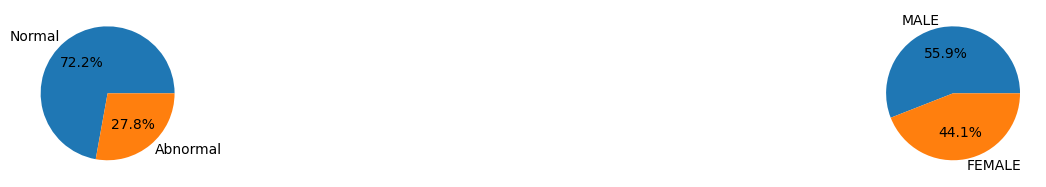

In [ ]:
# Plotting the features by pie chart
features = ['Rhythm', 'Gender']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(4, 2, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%1.1f%%')

plt.show()

In [ ]:
# Encode categorical variables (e.g., 'Gender')
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Beat'] = encoder.fit_transform(df['Beat'])

In [ ]:
df.head()

,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,Abnormal,685,85,1,117,234,114,356,496,81,-27,19,208,265,386
1,Normal,725,59,0,52,52,92,432,401,76,42,8,215,261,431
2,Normal,650,20,0,67,67,82,382,403,88,20,11,224,265,415
3,Normal,650,66,1,53,53,96,456,427,34,3,9,219,267,447
4,Abnormal,693,73,0,162,162,114,252,413,68,-40,26,228,285,354


In [ ]:
# Prepare the input features (X) and target labels (y)
X = df[['Beat', 'PatientAge', 'Gender', 'VentricularRate', 'AtrialRate', 'QRSDuration', 'QTInterval', 'QTCorrected', 'RAxis', 'TAxis', 'QRSCount', 'QOnset', 'QOffset', 'TOffset']]
y = df['Rhythm']

In [ ]:
# Encode the target labels into numerical format
y = encoder.fit_transform(y)

In [ ]:
column_names = df.columns.tolist()
i=1
for col in X:
  unique_values = df[col].nunique()
  print(f'The number of unique values in {column_names[i]} is {unique_values}.')
  i+=1


The number of unique values in Beat is 742.
The number of unique values in PatientAge is 95.
The number of unique values in Gender is 2.
The number of unique values in VentricularRate is 189.
The number of unique values in AtrialRate is 253.
The number of unique values in QRSDuration is 80.
The number of unique values in QTInterval is 206.
The number of unique values in QTCorrected is 295.
The number of unique values in RAxis is 277.
The number of unique values in TAxis is 356.
The number of unique values in QRSCount is 35.
The number of unique values in QOnset is 62.
The number of unique values in QOffset is 68.
The number of unique values in TOffset is 206.


In [ ]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

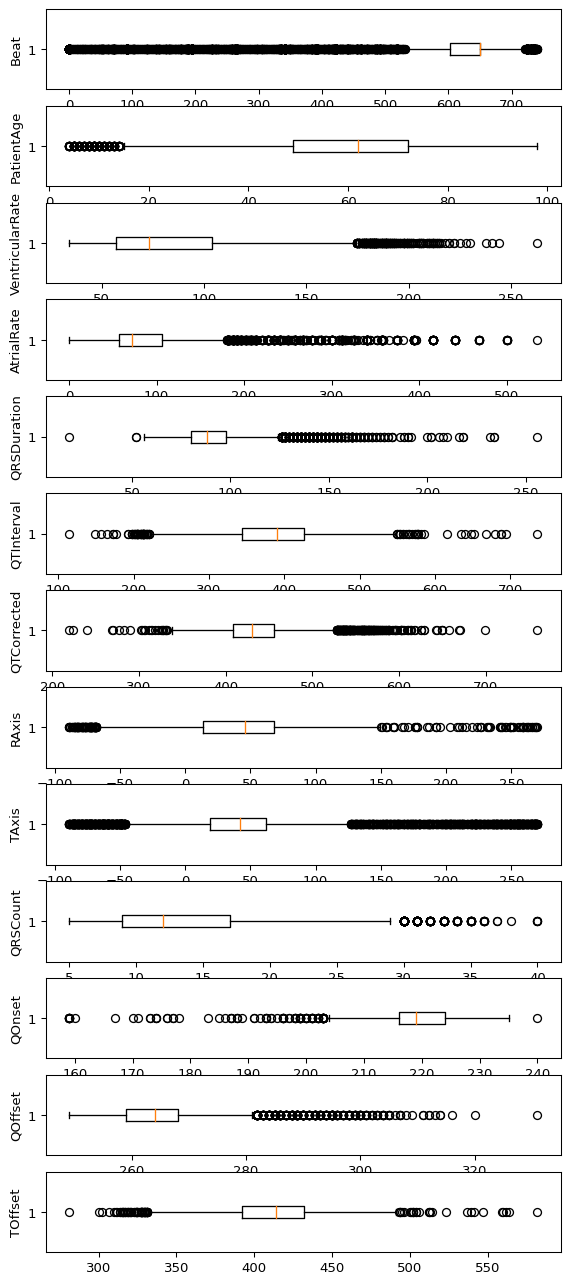

In [ ]:
import matplotlib.pyplot as plt

# Box Plots
box_features = ['Beat','PatientAge','VentricularRate','AtrialRate','QRSDuration','QTInterval','QTCorrected','RAxis','TAxis','QRSCount','QOnset','QOffset','TOffset']
fig, axs = plt.subplots(13,1,dpi=95, figsize=(7,17))
i = 0
for col in box_features:
	axs[i].boxplot(df[col], vert=False)
	axs[i].set_ylabel(col)
	i+=1
plt.show()

In [ ]:
column_names = df.columns.tolist()

i=1
for col in X:
  Q1=df[col].quantile(0.25)
  Q2=df[col].quantile(0.5)
  Q3=df[col].quantile(0.75)
  iqr=Q3-Q1
  lowlim=Q1-1.5*iqr
  upplim=Q3+1.5*iqr
  print(f'The upper limit and lower limit for {column_names[i]} is {upplim} and {lowlim}.')
  i+=1

The upper limit and lower limit for Beat is 720.5 and 532.5.
The upper limit and lower limit for PatientAge is 106.5 and 14.5.
The upper limit and lower limit for Gender is 2.5 and -1.5.
The upper limit and lower limit for VentricularRate is 174.5 and -13.5.
The upper limit and lower limit for AtrialRate is 179.5 and -16.5.
The upper limit and lower limit for QRSDuration is 125.0 and 53.0.
The upper limit and lower limit for QTInterval is 549.0 and 221.0.
The upper limit and lower limit for QTCorrected is 528.0 and 336.0.
The upper limit and lower limit for RAxis is 149.0 and -67.0.
The upper limit and lower limit for TAxis is 126.5 and -45.5.
The upper limit and lower limit for QRSCount is 29.0 and -3.0.
The upper limit and lower limit for QOnset is 236.0 and 204.0.
The upper limit and lower limit for QOffset is 281.5 and 245.5.
The upper limit and lower limit for TOffset is 492.0 and 332.0.


In [ ]:
column_names = df.columns.tolist()

i=1
for col in box_features:
  print(f'The skewiness of  {column_names[i]} is {df[col].skew()}.')
  i+=1

The skewiness of  Beat is -2.139234991882205.
The skewiness of  PatientAge is -0.6114628029861275.
The skewiness of  Gender is 1.2941476603839384.
The skewiness of  VentricularRate is 3.024300715509612.
The skewiness of  AtrialRate is 2.013825223742852.
The skewiness of  QRSDuration is -0.20693167080996241.
The skewiness of  QTInterval is 0.9067608269516076.
The skewiness of  QTCorrected is 0.021572410784218794.
The skewiness of  RAxis is 1.3830660766311729.
The skewiness of  TAxis is 1.2834979379678426.
The skewiness of  QRSCount is -1.5943298606940224.
The skewiness of  QOnset is 1.5721320705302397.
The skewiness of  QOffset is -0.21090026707996937.


In [ ]:
# Encode categorical variables (e.g., 'Rhythm') for obtaining it's correlation with other variables
encoder = LabelEncoder()
df['Rhythm'] = encoder.fit_transform(df['Rhythm'])

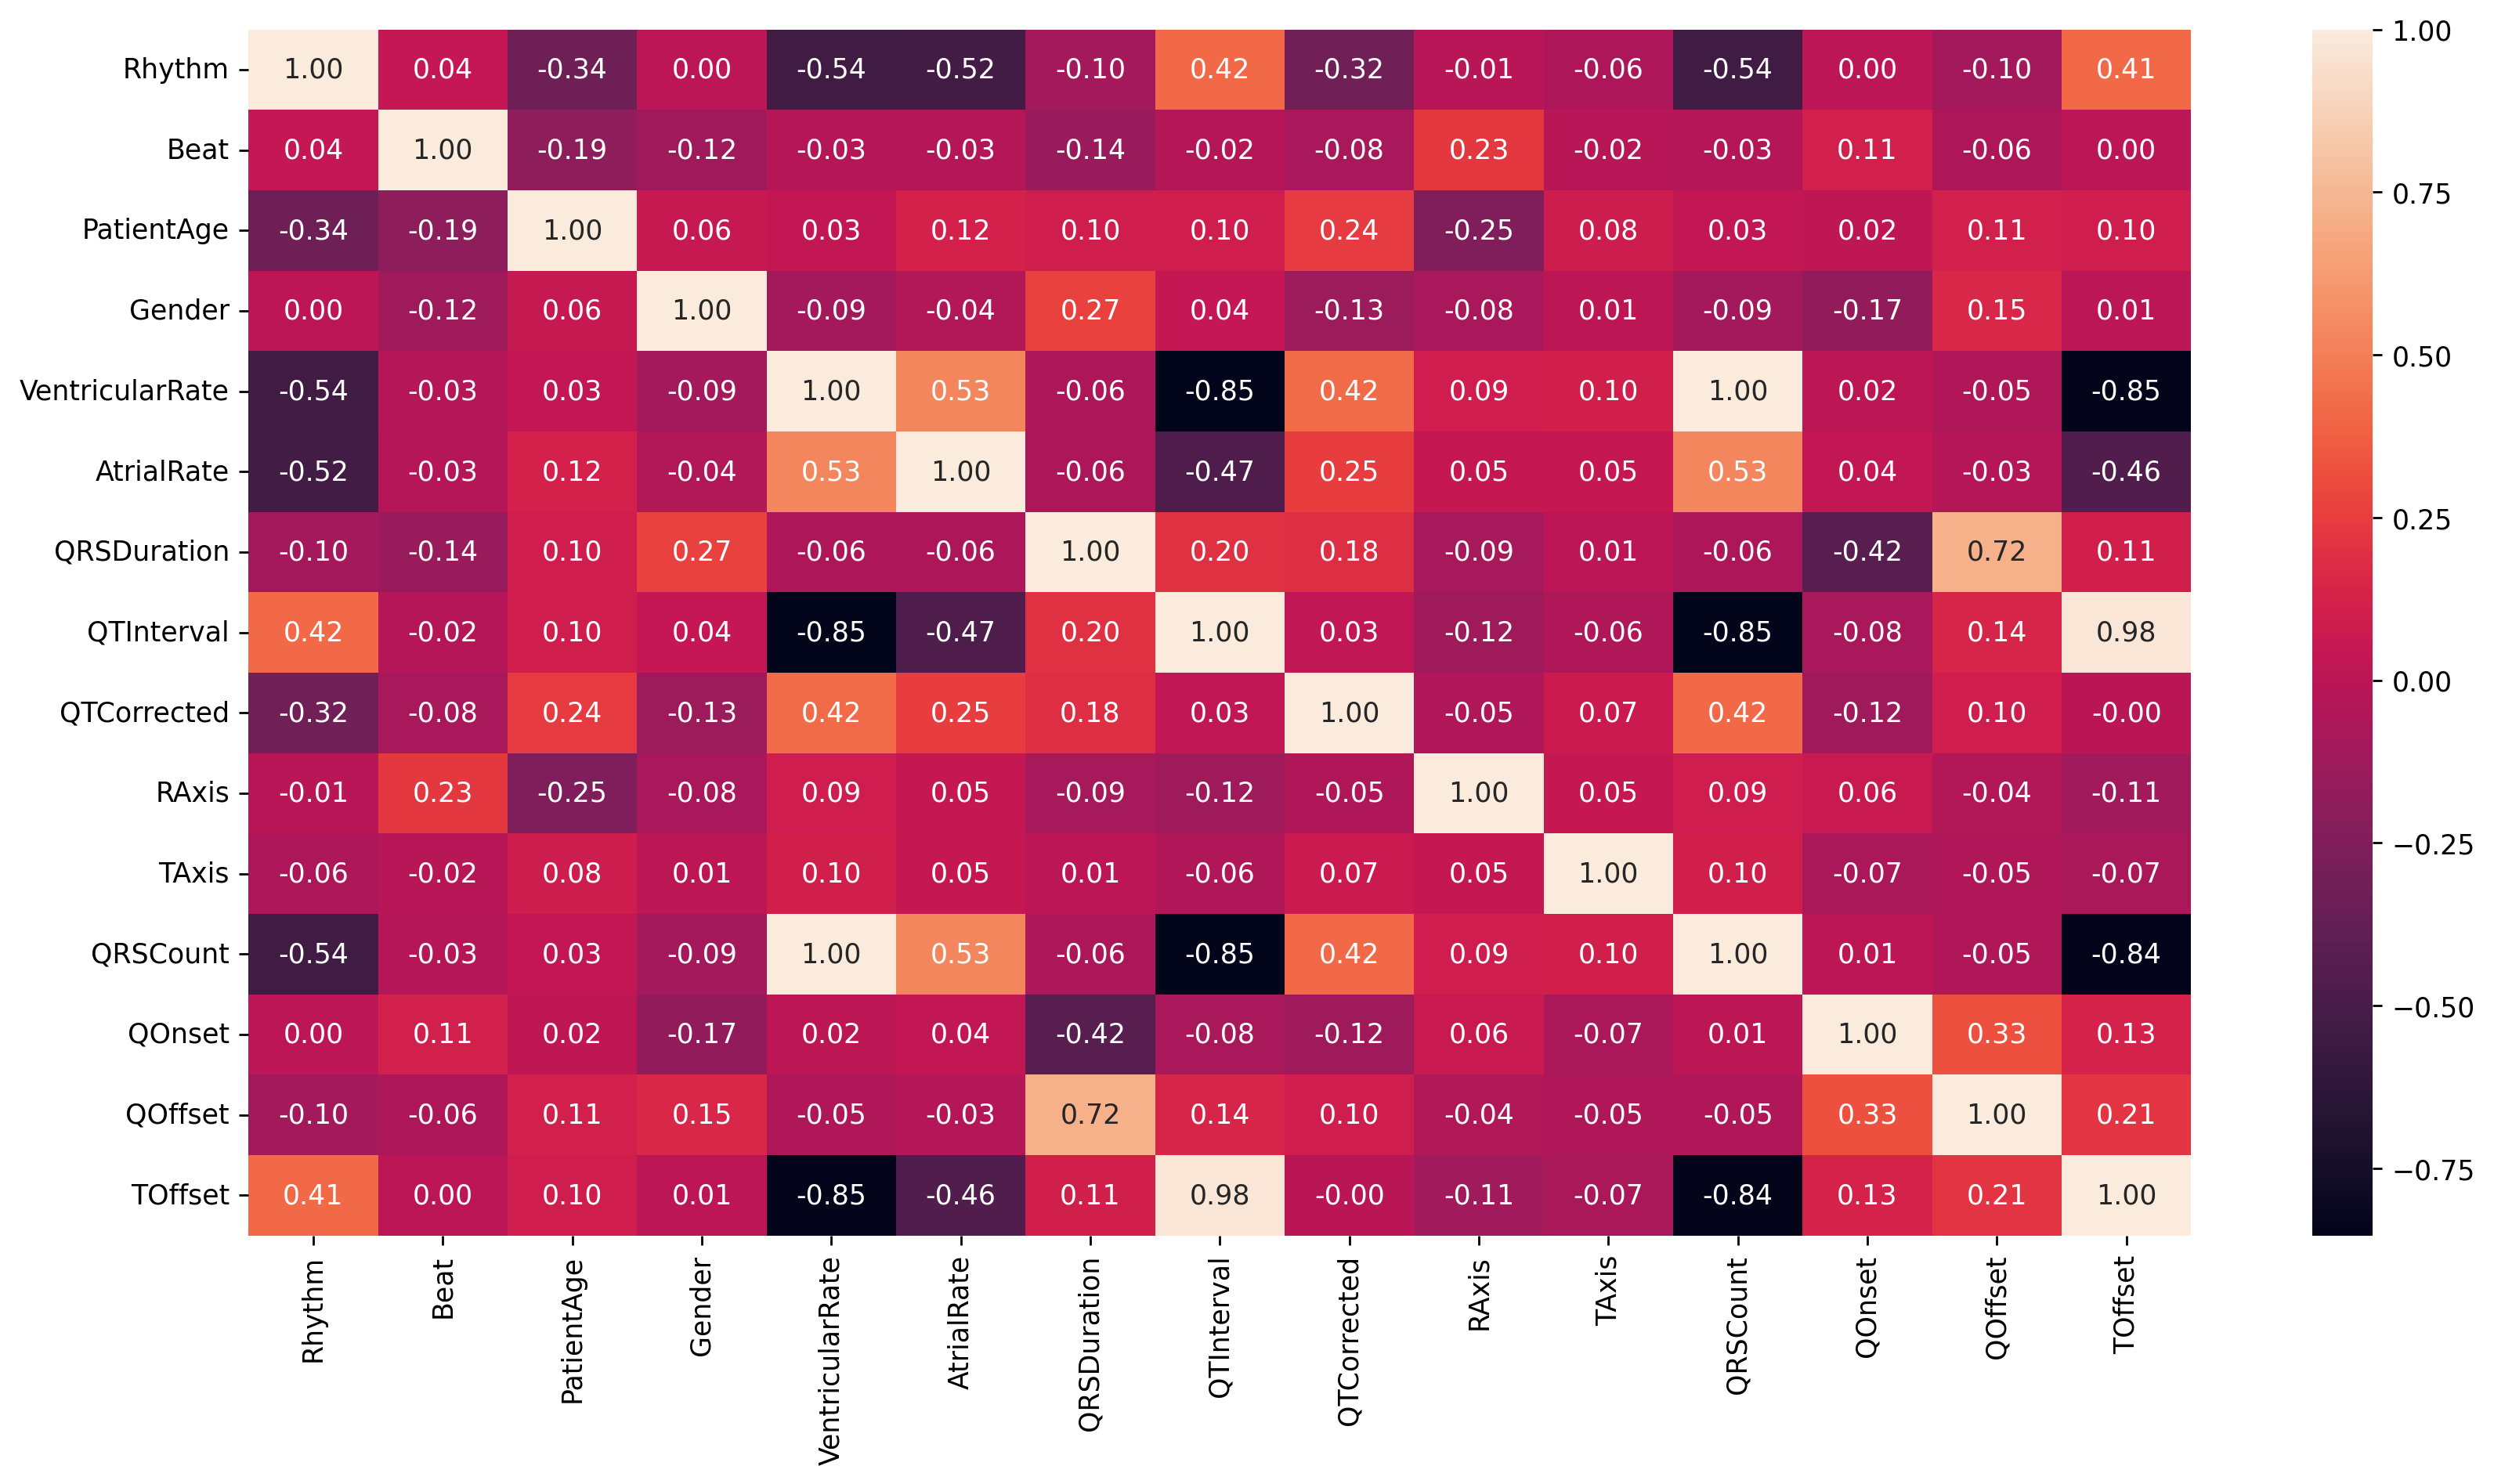

In [ ]:
import seaborn as sns

#correlation
corr = df.corr()

plt.figure(dpi=250,figsize=(16,8))
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

In [ ]:
# Impact of each column on output
corr['Rhythm'].sort_values(ascending = False)

Rhythm             1.000000
QTInterval         0.415596
TOffset            0.413939
Beat               0.044218
Gender             0.003095
QOnset             0.002099
RAxis             -0.013304
TAxis             -0.062164
QRSDuration       -0.100137
QOffset           -0.102703
QTCorrected       -0.316224
PatientAge        -0.338360
AtrialRate        -0.522952
QRSCount          -0.537474
VentricularRate   -0.541177
Name: Rhythm, dtype: float64

In [ ]:
# Extract the "Name" column and convert it to a tuple
lables = tuple(df["Rhythm"])
print(lables)

(0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 

In [ ]:
df = df.drop('Rhythm',axis=1)

list_of_tuples = [tuple(row) for row in df.values]
print(list_of_tuples)

[(685, 85, 1, 117, 234, 114, 356, 496, 81, -27, 19, 208, 265, 386), (725, 59, 0, 52, 52, 92, 432, 401, 76, 42, 8, 215, 261, 431), (650, 20, 0, 67, 67, 82, 382, 403, 88, 20, 11, 224, 265, 415), (650, 66, 1, 53, 53, 96, 456, 427, 34, 3, 9, 219, 267, 447), (693, 73, 0, 162, 162, 114, 252, 413, 68, -40, 26, 228, 285, 354), (650, 46, 0, 57, 57, 70, 404, 393, 38, 24, 9, 225, 260, 427), (725, 80, 0, 98, 86, 74, 360, 459, 69, 83, 17, 215, 252, 395), (650, 46, 1, 63, 63, 90, 376, 384, 24, 38, 11, 221, 266, 409), (650, 45, 1, 59, 59, 84, 390, 386, 78, 68, 10, 218, 260, 413), (650, 47, 0, 58, 58, 80, 420, 412, 80, 48, 10, 212, 252, 422), (570, 63, 1, 55, 55, 80, 436, 417, 74, 74, 9, 223, 263, 441), (650, 77, 1, 120, 120, 70, 306, 432, 39, 28, 20, 225, 260, 378), (0, 54, 1, 58, 58, 102, 432, 424, 2, 60, 10, 211, 262, 427), (90, 74, 1, 59, 59, 106, 400, 396, 48, 40, 10, 218, 271, 418), (650, 54, 0, 59, 59, 82, 416, 411, 12, 28, 9, 218, 259, 426), (711, 67, 0, 72, 65, 90, 416, 455, -1, -15, 12, 228,

In [ ]:
len(list_of_tuples)

10632

In [ ]:
len(lables)

10632

In [ ]:
#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(list_of_tuples, lables, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features (optional, but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape the data into a 3D tensor for use with an LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Convert target labels to one-hot encoded format
num_classes = len(encoder.classes_)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
import random
from sklearn.utils import shuffle

def create_clients(image_list, label_list, num_clients=10, initial='clients'):
    ''' return: a dictionary with keys clients' names and value as
                data shards - tuple of images and label lists.
        args:
            image_list: a list of numpy arrays of training images
            label_list:a list of binarized labels for each image
            num_client: number of fedrated members (clients)
            initials: the clients'name prefix, e.g, clients_1

    '''

    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #randomize the data
    data = list(zip(image_list, label_list))
    random.shuffle(data)

    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))}



#create clients
clients = create_clients(X_train, y_train, num_clients=4, initial='client')

In [ ]:
import tensorflow as tf

def batch_data(data_shard, bs=32):
    '''Takes in a clients data shard and create a tfds object off it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)


#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)

#process and batch the test set
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

In [ ]:
class SimpleMLP:
    @staticmethod
    def build():
        model = Sequential()

# CNN layer
        model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
        model.add(Conv1D(64, kernel_size=3, activation='sigmoid', input_shape=(X_train.shape[1], 1)))
# LSTM layer
        model.add(LSTM(32, activation='relu', return_sequences=True))

# You can add more LSTM layers if needed
        model.add(LSTM(32, activation='sigmoid', return_sequences=True))

# Adding more convolutional layers
        model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
        model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# MaxPooling layer
        model.add(MaxPooling1D(pool_size=3))

# Flatten before the fully connected layers
        model.add(layers.Flatten())

# Dense layers (fully connected)
        model.add(layers.Dense(128, activation='sigmoid'))
        model.add(layers.Dense(num_classes, activation='sigmoid'))
        return model


lr = 0.01
comms_round = 20
loss='categorical_crossentropy'
metrics = ['accuracy']
optimizer = 'adam'

In [ ]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad


def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1))
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss

In [ ]:
#initialize global model
smlp_global = SimpleMLP()
global_model = smlp_global.build()

#Initialize the tuples
accuracy_global=[]
loss_global=[]
count=[]
accuracy_model_1=[]
accuracy_model_2=[]
accuracy_model_3=[]
accuracy_model_4=[]
i=1

#commence global training loop
for comm_round in range(comms_round):

    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)

    #loop through each client and create new local model
    for client in client_names:
        smlp_local = SimpleMLP()
        local_model = smlp_local.build()
        local_model.compile(loss=loss,
                      optimizer=optimizer,
                      metrics=metrics)

        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)

        #fit local model with client's data
        local_model.fit(clients_batched[client], epochs=1, verbose=0)

        # Evaluate the local model on the client's test data
        _, local_accuracy = local_model.evaluate(clients_batched[client], verbose=0)
        #client_accuracies[client] = local_accuracy

        if(client=='client_1'):
          accuracy_model_1.append(local_accuracy)
        if(client=='client_2'):
          accuracy_model_2.append(local_accuracy)
        if(client=='client_3'):
          accuracy_model_3.append(local_accuracy)
        if(client=='client_4'):
          accuracy_model_4.append(local_accuracy)

        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)

        #clear session to free memory after each communication round
        K.clear_session()

    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)

    #update global model
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)
        accuracy_global.append(global_acc)
        loss_global.append(global_loss)
        count.append(i)
        i=i+1

67/67 [==============================] - 1s 4ms/step
comm_round: 0 | global_acc: 73.014% | global_loss: 0.6374380588531494
67/67 [==============================] - 0s 4ms/step
comm_round: 1 | global_acc: 83.780% | global_loss: 0.5395808219909668
67/67 [==============================] - 0s 4ms/step
comm_round: 2 | global_acc: 84.955% | global_loss: 0.546095609664917
67/67 [==============================] - 0s 5ms/step
comm_round: 3 | global_acc: 85.567% | global_loss: 0.5032263398170471
67/67 [==============================] - 0s 4ms/step
comm_round: 4 | global_acc: 86.272% | global_loss: 0.5250437259674072
67/67 [==============================] - 1s 8ms/step
comm_round: 5 | global_acc: 86.366% | global_loss: 0.5095617771148682
67/67 [==============================] - 1s 7ms/step
comm_round: 6 | global_acc: 86.084% | global_loss: 0.5031502842903137
67/67 [==============================] - 0s 4ms/step
comm_round: 7 | global_acc: 85.802% | global_loss: 0.5037689208984375
67/67 [==========

In [ ]:
# Compile the model
global_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
global_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            12352     
                                                                 
 lstm (LSTM)                 (None, 10, 32)            12416     
                                                                 
 lstm_1 (LSTM)               (None, 10, 32)            8320      
                                                                 
 conv1d_2 (Conv1D)           (None, 8, 64)             6208      
                                                                 
 conv1d_3 (Conv1D)           (None, 6, 64)             12352     
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 64)             0

In [ ]:
# Evaluate the model on the test set
y_pred = global_model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

67/67 [==============================] - 2s 8ms/step


In [ ]:
global_weights = global_model.get_weights()
print(global_weights)

[array([[[ 2.04133287e-01, -9.19503043e-04, -1.29145244e-03,
         -2.11448312e-01, -2.13235661e-01,  1.37956783e-01,
          1.27690211e-01, -3.22750513e-03, -2.09387153e-01,
          1.22773454e-01,  1.38136297e-01, -2.05931410e-01,
         -7.62582347e-02,  1.43172130e-01,  1.65938780e-01,
          2.46233255e-01, -2.33765602e-01, -1.27826214e-01,
         -1.61700435e-02, -4.48548142e-03,  2.22596407e-01,
         -1.66228086e-01, -6.99637383e-02,  1.24101579e-01,
         -2.09740728e-01, -8.21263045e-02,  7.91229829e-02,
         -1.61452830e-01, -2.26305127e-01,  8.04538727e-02,
         -1.85548549e-03,  1.25541776e-01, -2.39373311e-01,
          3.43154073e-02, -2.49330997e-02, -2.94520527e-01,
          6.03483152e-03, -1.97088838e-01, -2.03908950e-01,
         -1.44059281e-03,  1.26288652e-01, -2.02939838e-01,
          1.91442877e-01,  7.49018118e-02, -7.98702389e-02,
         -2.28431404e-01, -2.42935240e-01, -2.39820078e-01,
         -1.76245913e-01,  1.73220605e-

In [ ]:
# Compute classification report and confusion matrix
labels = encoder.classes_
classification_rep = classification_report(y_true, y_pred_classes, labels=range(num_classes), target_names=labels)
confusion_mat = confusion_matrix(y_true, y_pred_classes)

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = global_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

67/67 [==============================] - 2s 10ms/step - loss: 0.2815 - accuracy: 0.8759
Test accuracy: 0.875881552696228


In [ ]:
# Calculate recall, precision, specificity, and prevalence
recall = np.diag(confusion_mat) / np.sum(confusion_mat, axis=1)
precision = np.diag(confusion_mat) / np.sum(confusion_mat, axis=0)
#specificity = np.sum(np.delete(np.delete(confusion_mat, np.arange(num_classes), axis=0), np.arange(num_classes), axis=1) / np.sum(confusion_mat, axis=1))
prevalence = np.sum(confusion_mat, axis=1) / np.sum(confusion_mat)

print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)
print("Recall:", recall)
print("Precision:", precision)
print("Prevalence:", prevalence)

Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.83      0.68      0.75       574
      Normal       0.89      0.95      0.92      1553

    accuracy                           0.88      2127
   macro avg       0.86      0.81      0.83      2127
weighted avg       0.87      0.88      0.87      2127

Confusion Matrix:
 [[ 389  185]
 [  79 1474]]
Recall: [0.67770035 0.94913071]
Precision: [0.83119658 0.88848704]
Prevalence: [0.26986366 0.73013634]


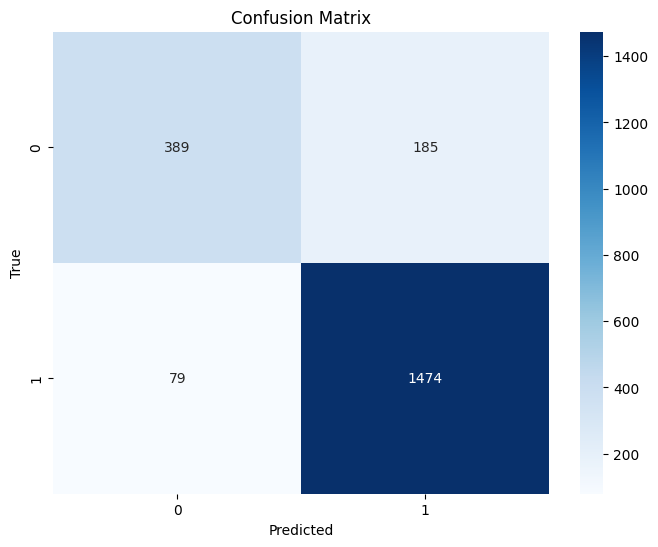

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


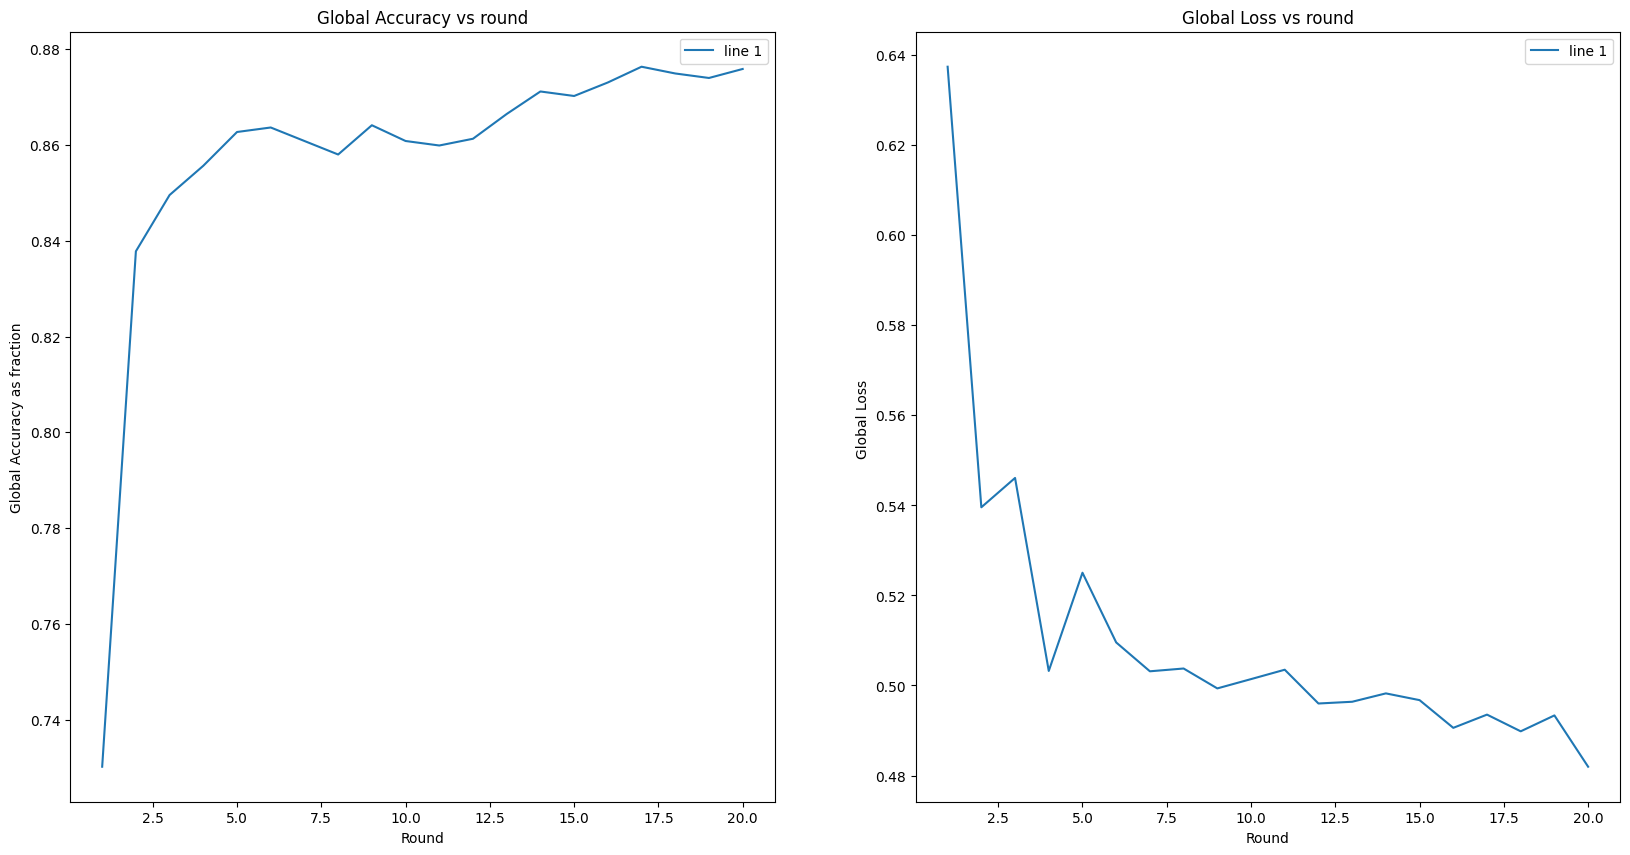

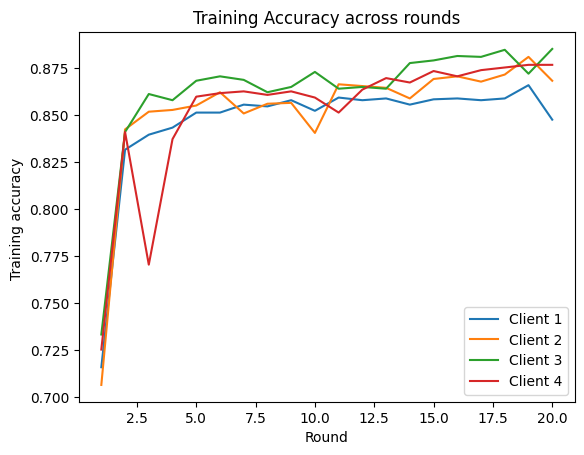

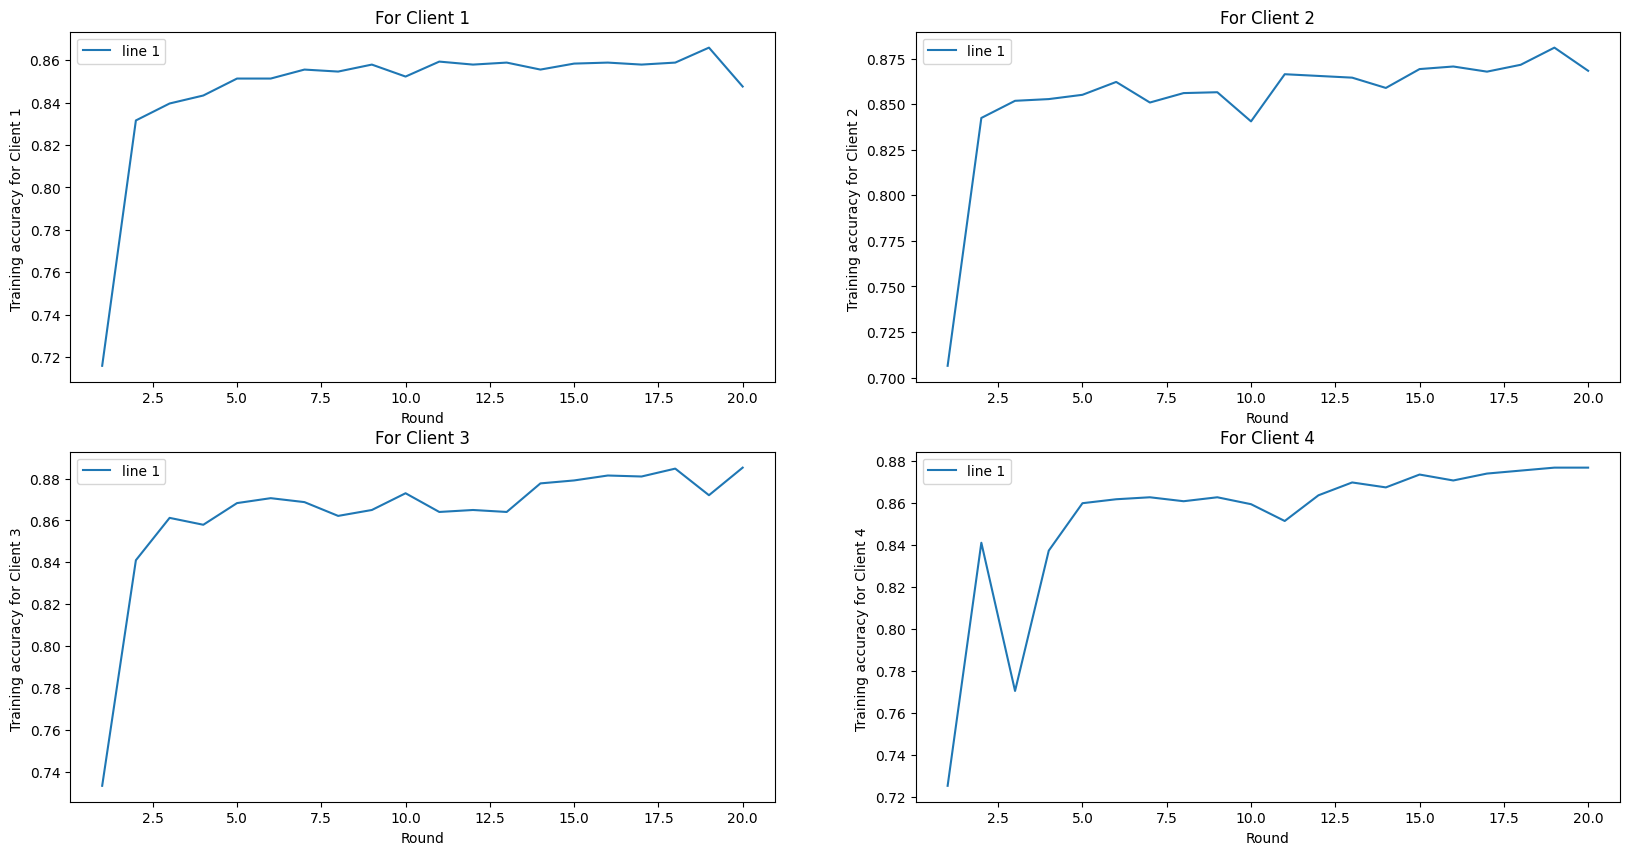

In [ ]:
# plot lines
plt.subplots(figsize=(20, 10))
plt.subplot(1,2,1)
plt.plot(count, accuracy_global, label = "line 1", linestyle="-")
plt.title('Global Accuracy vs round')
plt.xlabel('Round')
plt.ylabel('Global Accuracy as fraction')
plt.legend()

plt.subplot(1,2,2)
plt.plot(count, loss_global, label = "line 1", linestyle="-")
plt.title('Global Loss vs round')
plt.xlabel('Round')
plt.ylabel('Global Loss ')
plt.legend()
plt.show()

plt.plot(count, accuracy_model_1, label = "Client 1", linestyle="-")
plt.plot(count, accuracy_model_2, label = "Client 2", linestyle="-")
plt.plot(count, accuracy_model_3, label = "Client 3", linestyle="-")
plt.plot(count, accuracy_model_4, label = "Client 4", linestyle="-")
plt.title('Training Accuracy across rounds')
plt.xlabel('Round')
plt.ylabel('Training accuracy ')
plt.legend()
plt.show()

plt.subplots(figsize=(20, 10))
plt.subplot(2,2,1)
plt.plot(count, accuracy_model_1, label = "line 1", linestyle="-")
plt.title('For Client 1')
plt.xlabel('Round')
plt.ylabel('Training accuracy for Client 1 ')
plt.legend()

plt.subplot(2,2,2)
plt.plot(count, accuracy_model_2, label = "line 1", linestyle="-")
plt.title('For Client 2')
plt.xlabel('Round')
plt.ylabel('Training accuracy for Client 2 ')
plt.legend()

plt.subplot(2,2,3)
plt.plot(count, accuracy_model_3, label = "line 1", linestyle="-")
plt.title('For Client 3')
plt.xlabel('Round')
plt.ylabel('Training accuracy for Client 3 ')
plt.legend()

plt.subplot(2,2,4)
plt.plot(count, accuracy_model_4, label = "line 1", linestyle="-")
plt.title('For Client 4')
plt.xlabel('Round')
plt.ylabel('Training accuracy for Client 4 ')
plt.legend()

plt.show()